In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
from GeneticAlgorithm import GeneticAlgorithm
from HillClimbing import HillClimbing
from AntColony import AntColonyOptimization
np.random.seed(7)
random.seed(7)

In [2]:
# Carregar a matriz de adjacência
with open('matriz_de_adjacência.json', 'r') as file:
    matriz = json.load(file)
display(matriz)

[[0, 20, 0, 0, 0, 0, 0, 29, 0, 0, 0, 29, 37, 0, 0, 0, 0, 0],
 [20, 0, 25, 0, 0, 0, 0, 28, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0],
 [0, 25, 0, 25, 0, 0, 0, 30, 0, 0, 0, 0, 54, 0, 0, 0, 0, 0],
 [0, 0, 25, 0, 39, 32, 42, 0, 23, 33, 0, 0, 0, 56, 0, 0, 0, 0],
 [0, 0, 0, 39, 0, 12, 26, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 32, 12, 0, 17, 0, 0, 35, 30, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 42, 26, 17, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0],
 [29, 28, 30, 0, 0, 0, 0, 0, 0, 0, 0, 25, 22, 0, 0, 0, 0, 0],
 [0, 0, 0, 23, 0, 0, 0, 0, 0, 26, 0, 0, 34, 0, 0, 43, 0, 0],
 [0, 0, 0, 33, 19, 35, 0, 0, 26, 0, 24, 0, 0, 30, 19, 0, 0, 0],
 [0, 0, 0, 0, 0, 30, 38, 0, 0, 24, 0, 0, 0, 0, 26, 0, 0, 36],
 [29, 39, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 27, 0, 0, 43, 0, 0],
 [37, 0, 54, 0, 0, 0, 0, 22, 34, 0, 0, 27, 0, 24, 0, 19, 0, 0],
 [0, 0, 0, 56, 0, 0, 0, 0, 0, 30, 0, 0, 24, 0, 20, 19, 17, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 26, 0, 0, 20, 0, 0, 18, 21],
 [0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0, 43, 19, 19, 0, 0, 26, 0],
 [0, 0,

In [3]:
# Número de cidades
n_cidades = len(matriz)
display(n_cidades)

18

In [4]:
# Algoritmo de Floyd-Warshall
def floyd_warshall(matriz):
    n = len(matriz)
    dist = [[float('inf')] * n for _ in range(n)]
    for i in range(n):
        dist[i][i] = 0
        for j in range(n):
            if matriz[i][j] != 0:
                dist[i][j] = matriz[i][j]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

# Aplicar Floyd-Warshall à matriz
matriz_completa = floyd_warshall(matriz)
display(matriz_completa)

[[0, 20, 45, 70, 109, 102, 112, 29, 71, 91, 107, 29, 37, 61, 81, 56, 78, 93],
 [20, 0, 25, 50, 89, 82, 92, 28, 73, 83, 107, 39, 50, 74, 94, 69, 91, 106],
 [45, 25, 0, 25, 64, 57, 67, 30, 48, 58, 82, 55, 52, 76, 77, 71, 93, 98],
 [70, 50, 25, 0, 39, 32, 42, 55, 23, 33, 57, 80, 57, 56, 52, 66, 70, 73],
 [109, 89, 64, 39, 0, 12, 26, 94, 45, 19, 42, 100, 73, 49, 38, 68, 56, 59],
 [102, 82, 57, 32, 12, 0, 17, 87, 55, 31, 30, 112, 85, 61, 50, 80, 68, 66],
 [112, 92, 67, 42, 26, 17, 0, 97, 65, 45, 38, 122, 99, 75, 64, 94, 82, 74],
 [29, 28, 30, 55, 94, 87, 97, 0, 56, 76, 92, 25, 22, 46, 66, 41, 63, 78],
 [71, 73, 48, 23, 45, 55, 65, 56, 0, 26, 50, 61, 34, 56, 45, 43, 63, 66],
 [91, 83, 58, 33, 19, 31, 45, 76, 26, 0, 24, 81, 54, 30, 19, 49, 37, 40],
 [107, 107, 82, 57, 42, 30, 38, 92, 50, 24, 0, 97, 70, 46, 26, 65, 44, 36],
 [29, 39, 55, 80, 100, 112, 122, 25, 61, 81, 97, 0, 27, 51, 71, 43, 68, 83],
 [37, 50, 52, 57, 73, 85, 99, 22, 34, 54, 70, 27, 0, 24, 44, 19, 41, 56],
 [61, 74, 76, 56, 49,

Executando rodada 1/50...
Executando rodada 2/50...
Executando rodada 3/50...
Executando rodada 4/50...
Executando rodada 5/50...
Executando rodada 6/50...
Executando rodada 7/50...
Executando rodada 8/50...
Executando rodada 9/50...
Executando rodada 10/50...
Executando rodada 11/50...
Executando rodada 12/50...
Executando rodada 13/50...
Executando rodada 14/50...
Executando rodada 15/50...
Executando rodada 16/50...
Executando rodada 17/50...
Executando rodada 18/50...
Executando rodada 19/50...
Executando rodada 20/50...
Executando rodada 21/50...
Executando rodada 22/50...
Executando rodada 23/50...
Executando rodada 24/50...
Executando rodada 25/50...
Executando rodada 26/50...
Executando rodada 27/50...
Executando rodada 28/50...
Executando rodada 29/50...
Executando rodada 30/50...
Executando rodada 31/50...
Executando rodada 32/50...
Executando rodada 33/50...
Executando rodada 34/50...
Executando rodada 35/50...
Executando rodada 36/50...
Executando rodada 37/50...
Executando

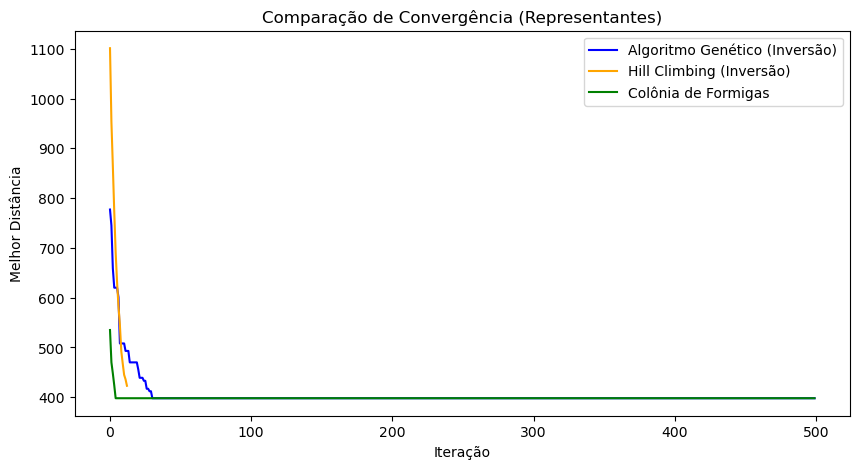


Visualizando as rotas dos representantes:
Rota Algoritmo Genético: [0, 1, 2, 3, 8, 9, 4, 5, 6, 10, 14, 17, 16, 13, 15, 12, 7, 11]


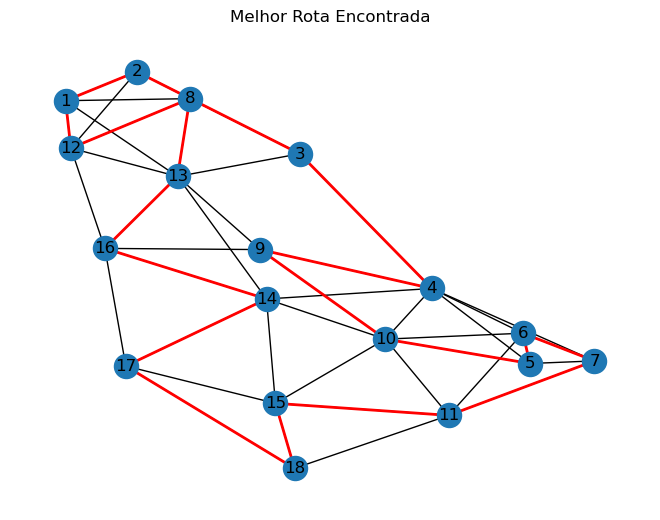

Rota Hill Climbing: [0, 11, 7, 12, 15, 13, 16, 17, 14, 10, 9, 4, 5, 6, 3, 8, 2, 1]


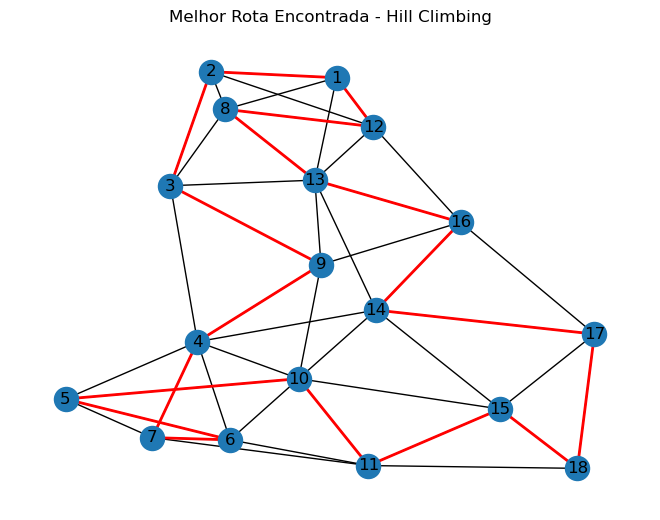

Rota Colônia de Formigas: [0, 1, 2, 3, 8, 9, 4, 5, 6, 10, 14, 17, 16, 13, 15, 12, 7, 11]


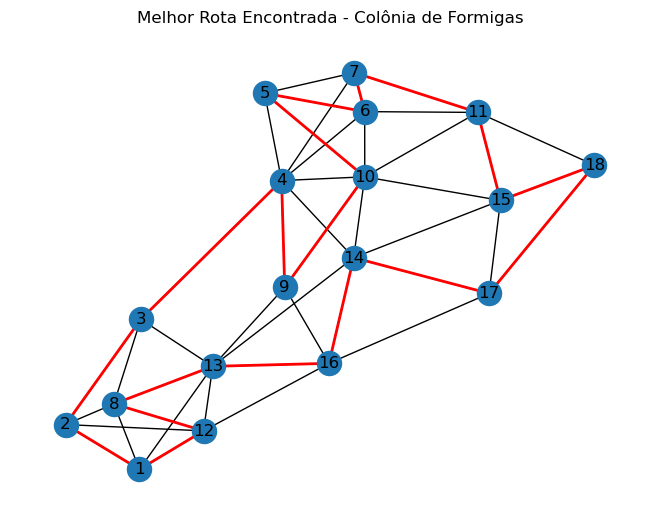

In [5]:
# Função para comparar os algoritmos

historico_ga_representante = None
historico_hc_representante = None
historico_aco_representante = None

melhor_rota_ga_representante = None
melhor_rota_hc_representante = None
melhor_rota_aco_representante = None
def compare_algorithms(matriz_completa, matriz_original, n_cidades, num_runs=50):
    # Dicionários para armazenar resultados
    results_ga = {'distances': [], 'times': [], 'historicos': [], 'iter_at_best': [], 'best_routes': []}  # Algoritmo Genético (inversão)
    results_hc = {'distances': [], 'times': [], 'historicos': [], 'iter_at_best': [], 'best_routes': []}  # Hill Climbing (inversão)
    results_aco = {'distances': [], 'times': [], 'historicos': [], 'iter_at_best': [], 'best_routes': []}  # Colônia de Formigas

    # Executar cada algoritmo várias vezes
    for run in range(num_runs):
        print(rf"Executando rodada {run + 1}/{num_runs}...")

        # Algoritmo Genético (com inversão)
        start_time = time.time()
        ga = GeneticAlgorithm(matriz_completa, matriz_original, n_cidades, tipo_mutacao=1)  # 1 para inversão
        melhor_rota_ga, melhor_distancia_ga, historico_ga = ga.run()
        tempo_ga = time.time() - start_time
        results_ga['distances'].append(melhor_distancia_ga)
        results_ga['times'].append(tempo_ga)
        results_ga['historicos'].append(historico_ga)
        iter_at_best_ga = np.argmin(historico_ga)
        results_ga['iter_at_best'].append(iter_at_best_ga)
        results_ga['best_routes'].append(melhor_rota_ga)

        # Hill Climbing (com inversão)
        start_time = time.time()
        hc = HillClimbing(matriz_completa, matriz_original, n_cidades, tipo_permutacao=1)  # 1 para inversão
        melhor_rota_hc, melhor_distancia_hc, historico_hc, tempo_hc = hc.run()
        results_hc['distances'].append(melhor_distancia_hc)
        results_hc['times'].append(tempo_hc)
        results_hc['historicos'].append(historico_hc)
        iter_at_best_hc = np.argmin(historico_hc)
        results_hc['iter_at_best'].append(iter_at_best_hc)
        results_hc['best_routes'].append(melhor_rota_hc)

        # Colônia de Formigas
        start_time = time.time()
        aco = AntColonyOptimization(matriz_completa, matriz_original, n_cidades)
        melhor_rota_aco, melhor_distancia_aco, historico_aco, tempo_aco = aco.run()
        results_aco['distances'].append(melhor_distancia_aco)
        results_aco['times'].append(tempo_aco)
        results_aco['historicos'].append(historico_aco)
        iter_at_best_aco = np.argmin(historico_aco)
        results_aco['iter_at_best'].append(iter_at_best_aco)
        results_aco['best_routes'].append(melhor_rota_aco)

    # Calcular médias e desvios padrão
    avg_distance_ga = np.mean(results_ga['distances'])
    std_distance_ga = np.std(results_ga['distances'])
    avg_time_ga = np.mean(results_ga['times'])
    std_time_ga = np.std(results_ga['times'])
    avg_iter_ga = np.mean(results_ga['iter_at_best'])
    std_iter_ga = np.std(results_ga['iter_at_best'])

    avg_distance_hc = np.mean(results_hc['distances'])
    std_distance_hc = np.std(results_hc['distances'])
    avg_time_hc = np.mean(results_hc['times'])
    std_time_hc = np.std(results_hc['times'])
    avg_iter_hc = np.mean(results_hc['iter_at_best'])
    std_iter_hc = np.std(results_hc['iter_at_best'])

    avg_distance_aco = np.mean(results_aco['distances'])
    std_distance_aco = np.std(results_aco['distances'])
    avg_time_aco = np.mean(results_aco['times'])
    std_time_aco = np.std(results_aco['times'])
    avg_iter_aco = np.mean(results_aco['iter_at_best'])
    std_iter_aco = np.std(results_aco['iter_at_best'])

    # Encontrar representantes (mais próximos da média)
    idx_ga = np.argmin(np.abs(np.array(results_ga['distances']) - avg_distance_ga))
    idx_hc = np.argmin(np.abs(np.array(results_hc['distances']) - avg_distance_hc))
    idx_aco = np.argmin(np.abs(np.array(results_aco['distances']) - avg_distance_aco))

    historico_ga_representante = results_ga['historicos'][idx_ga]
    historico_hc_representante = results_hc['historicos'][idx_hc]
    historico_aco_representante = results_aco['historicos'][idx_aco]

    melhor_rota_ga_representante = results_ga['best_routes'][idx_ga]
    melhor_rota_hc_representante = results_hc['best_routes'][idx_hc]
    melhor_rota_aco_representante = results_aco['best_routes'][idx_aco]

    # Encontrar iteração do menor valor para cada representante
    iter_min_ga = np.argmin(historico_ga_representante)
    iter_min_hc = np.argmin(historico_hc_representante)
    iter_min_aco = np.argmin(historico_aco_representante)

    # Imprimir resultados
    print(rf"\nComparativo dos Algoritmos (média de {num_runs} rodadas):")
    print(rf"Algoritmo Genético (Inversão) - Distância Média: {avg_distance_ga:.2f} \pm {std_distance_ga:.2f}, ")
    print(rf"Tempo Médio: {avg_time_ga:.4f} \pm {std_time_ga:.4f} segundos, ")
    print(rf"Gerações Médias: {avg_iter_ga:.2f} \pm {std_iter_ga:.2f}")
    print(rf"Hill Climbing (Inversão) - Distância Média: {avg_distance_hc:.2f} \pm {std_distance_hc:.2f}, ")
    print(rf"Tempo Médio: {avg_time_hc:.4f} \pm {std_time_hc:.4f} segundos, ")
    print(rf"Iterações Médias: {avg_iter_hc:.2f} \pm {std_iter_hc:.2f}")
    print(rf"Colônia de Formigas - Distância Média: {avg_distance_aco:.2f} \pm {std_distance_aco:.2f}, ")
    print(rf"Tempo Médio: {avg_time_aco:.4f} \pm {std_time_aco:.4f} segundos, ")
    print(rf"Iterações Médias: {avg_iter_aco:.2f} \pm {std_iter_aco:.2f}")
    
    print(rf"\nRepresentantes (mais próximos da média):")
    print(rf"GA - Índice: {idx_ga}, Distância: {results_ga['distances'][idx_ga]:.2f}, ")
    print(rf"Iteração do Menor Valor: {iter_min_ga}")
    print(rf"HC - Índice: {idx_hc}, Distância: {results_hc['distances'][idx_hc]:.2f}, ")
    print(rf"Iteração do Menor Valor: {iter_min_hc}")
    print(rf"ACO - Índice: {idx_aco}, Distância: {results_aco['distances'][idx_aco]:.2f}, ")
    print(rf"Iteração do Menor Valor: {iter_min_aco}")

    # Gráfico de convergência dos representantes
    plt.figure(figsize=(10, 5))
    plt.plot(historico_ga_representante, label='Algoritmo Genético (Inversão)', color='blue')
    plt.plot(historico_hc_representante, label='Hill Climbing (Inversão)', color='orange')
    plt.plot(historico_aco_representante, label='Colônia de Formigas', color='green')
    plt.xlabel('Iteração')
    plt.ylabel('Melhor Distância')
    plt.title('Comparação de Convergência (Representantes)')
    plt.legend()
    plt.savefig('Convergencia_Comparativa_Q1.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()

    # Visualizar as rotas dos representantes
    print("\nVisualizando as rotas dos representantes:")
    ga = GeneticAlgorithm(matriz_completa, matriz_original, n_cidades, tipo_mutacao=1)
    hc = HillClimbing(matriz_completa, matriz_original, n_cidades, tipo_permutacao=1)
    aco = AntColonyOptimization(matriz_completa, matriz_original, n_cidades)

    print(rf"Rota Algoritmo Genético: {melhor_rota_ga_representante}")
    ga.plot_route(melhor_rota_ga_representante)

    print(rf"Rota Hill Climbing: {melhor_rota_hc_representante}")
    hc.plot_route(melhor_rota_hc_representante)

    print(rf"Rota Colônia de Formigas: {melhor_rota_aco_representante}")
    aco.plot_route(melhor_rota_aco_representante)

    # Retornar resultados para uso futuro
    return results_ga, results_hc, results_aco

# Executar a comparação
results_ga, results_hc, results_aco = compare_algorithms(matriz_completa, matriz, n_cidades, num_runs=50)

In [6]:
np.array([0, 1, 2, 3, 8, 9, 4, 5, 6, 10, 14, 17, 16, 13, 15, 12, 7, 11]) +1

array([ 1,  2,  3,  4,  9, 10,  5,  6,  7, 11, 15, 18, 17, 14, 16, 13,  8,
       12])

In [7]:
np.array([0, 11, 7, 12, 15, 13, 16, 17, 14, 10, 9, 4, 5, 6, 3, 8, 2, 1]) +1

array([ 1, 12,  8, 13, 16, 14, 17, 18, 15, 11, 10,  5,  6,  7,  4,  9,  3,
        2])

In [8]:
np.array([0, 1, 2, 3, 8, 9, 4, 5, 6, 10, 14, 17, 16, 13, 15, 12, 7, 11]) +1

array([ 1,  2,  3,  4,  9, 10,  5,  6,  7, 11, 15, 18, 17, 14, 16, 13,  8,
       12])